In [9]:
# Data Processing
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
from plotly.subplots import make_subplots
pio.templates.default = "plotly_white"
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [10]:
# Read the train data file
train_data = pd.read_csv('train.csv')

# Find general information regarding test data
print(train_data.head)
print(train_data.columns)

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [11]:
# Determine quantity of null values within data set
print('Train Data Null Values')
print(train_data.isnull().sum(), "\n")

# Delete rows with null values within data set
train_data = train_data.dropna()
print('Train Data Null Values')
print(train_data.isnull().sum())

# train_data = train_data.drop(['Loan_ID'], axis=1)

Train Data Null Values
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64 

Train Data Null Values
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


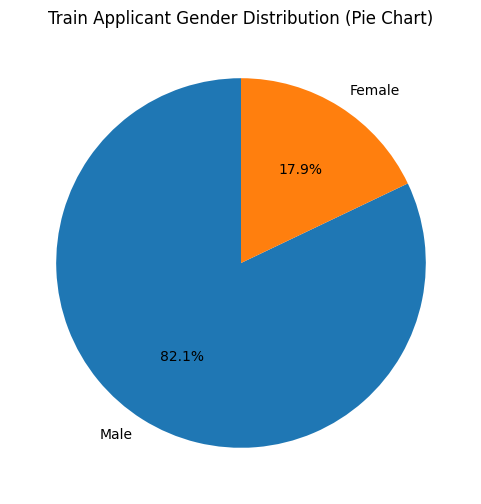

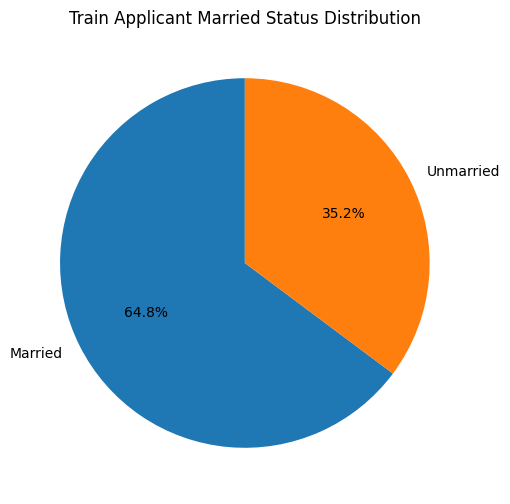

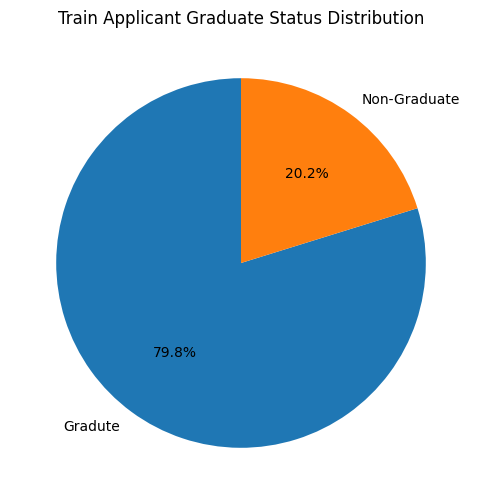

TypeError: pie() got an unexpected keyword argument 'hue'

<Figure size 600x600 with 0 Axes>

In [ ]:
# Display the current train data
# Display test data gender distrubution: Pie Chart
test_gender_data = train_data['Gender']
test_gender_counts = test_gender_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_gender_counts,
        labels=['Male','Female'],
        autopct='%1.1f%%',
        startangle=90)
test_gender_fig = plt.title('Train Applicant Gender Distribution (Pie Chart)')
plt.show()

# Display test data married status distrubution: Pie Chart
test_married_data = train_data['Married']
test_married_counts = test_married_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_married_counts,
        labels=['Married','Unmarried'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Married Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_grad_data = train_data['Education']
test_grad_counts = test_grad_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_grad_counts,
        labels=['Gradute','Non-Graduate'],
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Graduate Status Distribution')
plt.show()

# Display test data graduate distrubution: Pie Chart
test_selfEmploy_data = train_data['Self_Employed']
test_selfEmploy_counts = test_selfEmploy_data.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(test_selfEmploy_counts,
        labels=['Non Self-Employed','Self-Employed'],
        hue='Loan_Status',
        autopct='%1.1f%%',
        startangle=90)
plt.title('Train Applicant Self-Employed Status Distribution')
plt.show()

# Display test data number of dependants distrubution: Bar Chart
test_dependant_data = train_data['Dependents']
plt.figure(figsize=(6, 6))
plt.hist(test_dependant_data,
         bins=10,
         edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Train Applicant Dependants Distribution')
plt.ylabel('Frequency')
plt.show()

# Creatiing a Histogram of Distribution of Applicant Income
plt.figure(figsize=(6, 6))
applicant_income = train_data['ApplicantIncome']
plt.hist(applicant_income, bins=10, edgecolor='black')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Applicant Incomes')
# plt.show()unt')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amounts by Loan_Status')
plt.legend()  # Show the legend to distinguish the two histograms
plt.show()


# Creatiing a Histogram of Distribution of Coapplicant Income
coapplicant_income = train_data['CoapplicantIncome']
plt.hist(coapplicant_income, bins=10, edgecolor='black')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.title('Distribution of Coapplicant Income')
plt.show()


# Creatiing a Histogram of Distribution of Loan Amounts
loan_amount = train_data['LoanAmount']
plt.hist(loan_amount, bins=10, edgecolor='black')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Train Distribution of Loan Amounts')
plt.show()


#Creating a Countplot of Distribution of Loan Amount Terms
loan_amount_term = train_data['Loan_Amount_Term']
plt.figure(figsize=(10, 6))
sns.countplot(x=loan_amount_term)
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.title('Train Loan Amount Term Distribution (Countplot)')
plt.xticks(rotation=45)
plt.show()


# Creating a Piechart of Distribution of Loan Amount Terms
credit_history = train_data['Credit_History']
credit_history_counts = credit_history.value_counts()
plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Credit History Distribution (Pie Chart)')
plt.show()



# Creatiing a Piechart of Distribution of Property Areas
property_area = train_data['Property_Area']
property_area_counts = property_area.value_counts()
plt.figure(figsize=(6, 6))
plt.pie(property_area_counts, labels=property_area_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Train Property Area Distribution (Pie Chart)')
plt.show()

Train a machine learning model to read our data

In [ ]:
# Examine shape and columns of train data
print('Shape of Train Data:', train_data.shape, '\n')
print('Columns in Train Data:', train_data.columns)

Shape of Train Data: (480, 12) 

Columns in Train Data: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
# Create categorical and numerical columns to train model
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Seperate the target variable and drop it from the train data
loanStatus = train_data['Loan_Status']
train_data = train_data.drop(['Loan_Status'], axis=1)

In [ ]:
# Importing the required libraries to encode data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Creating an instance of the OneHotEncoder with 'handle_unknown' parameter set to 'ignore'
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Using the OneHotEncoder to transform the categorical columns in the 'train_data' DataFrame
ohe_X = pd.DataFrame(encoder.fit_transform(train_data[categorical_columns]))

# Assigning column names to the one-hot encoded DataFrame using the original categorical column names
ohe_X.columns = encoder.get_feature_names_out(categorical_columns)

# Dropping the original categorical columns from the 'train_data' DataFrame
train_data.drop(categorical_columns, axis=1, inplace=True)

# Setting the index of the one-hot encoded DataFrame to match the 'train_data' index
ohe_X.index = train_data.index

# Concatenating the one-hot encoded DataFrame with the remaining columns of 'train_data'
train_data = pd.concat([train_data, ohe_X], axis=1)

# Displaying the first few rows of the updated 'train_data' DataFrame
train_data.head()


c:\Users\alexr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Credit_History_1.0,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0
1,4583,1508.0,128.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3000,0.0,66.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2583,2358.0,120.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,6000,0.0,141.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,5417,4196.0,267.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#FOR LOAN AMOUNT PREDICTION

## In the 2nd previous chunk of code, we dropped loan status from train data already. If we want to keep loan amount prediction analysis, we should drop loan status after this chunk of code.

# Import necessary libraries
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# X should contain all the features except the target variable
X = train_data.drop(['LoanAmount'], axis=1)
y = train_data['LoanAmount']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate the R-squared score to evaluate the model's performance
r_squared = r2_score(y_test, y_pred)
print("R-squared Score:", r_squared)

Mean Squared Error: 4872.345046875001
R-squared Score: 0.42005959959698724


The MSE value of 4872.35 indicates that, on average, the squared difference between the predicted loan amounts and the actual loan amounts is around 4872.35. A lower MSE is desirable, and it suggests that the model's predictions are closer to the actual values.

The R-squared score of 0.42 means that the model explains approximately 42% of the variance in the target variable (LoanAmount). An R-squared score closer to 1 indicates a better fit of the model to the data, while a lower value suggests that the model's predictions are not capturing the variance well.

To improve the model's performance, consider the suggestions mentioned earlier, such as feature engineering, hyperparameter tuning, handling outliers, and trying different regression algorithms. Additionally, you can experiment with other evaluation metrics and visualize the model's performance to gain further insights.

In [ ]:
# FOR LOAN STATUS PREDICTION

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#  'train_data' is our DataFrame with all the encoded features, and 'loanStatus' is the target variable
X = train_data
y = loanStatus

# Step 1: Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Cho# Step 2: Choose a machine learning algorithm and create an instance of the model
most_effective = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Fit the model to the training data
most_effective.fit(X_train, y_train)

# ctions on the testing data
most_effective_ypred = most_effective.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy = accuracy_score(y_test, most_effective_ypred)
classification_report_output = classification_report(y_test, most_effective_ypred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.8229166666666666
Classification Report:
              precision    recall  f1-score   support

           N       0.87      0.46      0.60        28
           Y       0.81      0.97      0.89        68

    accuracy                           0.82        96
   macro avg       0.84      0.72      0.75        96
weighted avg       0.83      0.82      0.80        96



In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Create the decision tree classifier with a maximum depth of 3 (you can adjust this value)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(most_effective, feature_names=X.columns.tolist(), class_names=list(y.unique()), filled=True)
plt.show()

# Choose the index of the tree you want to visualize (0 to n_estimators-1)
tree_index = 0

# Visualize the decision tree from the Random Forest
plt.figure(figsize=(12, 8))
plot_tree(most_effective.estimators_[tree_index], feature_names=most_effective.feature_names, class_names=most_effective.target_names, filled=True)
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(random_state=42) instead.

<Figure size 1200x800 with 0 Axes>

In [ ]:
# HYPERPARAMETER TUNING with the Random Forest Classifier. 
from sklearn.model_selection import train_test_split, GridSearchCV

model = RandomForestClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [50, 100, 150], # number of trees in a random forest model. It specifies the number of decision trees that will be combined to make predictions. 
    'max_depth': [None, 5, 10], # The values [None, 5, 10] mean that the model will be tested with no maximum depth (None) and two other specific values.
    'min_samples_split': [2, 5, 10], # minimum number of samples required to split an internal node in a decision tree. It determines the minimum number of data points needed to consider a split.
    'min_samples_leaf': [1, 2, 4] # minimum number of samples required to be at a leaf node (i.e., a final output) in a decision tree.
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') # GridSearchCV is a class from scikit-learn that searches for the best combination of hyperparameters that yields the highest model performance.
grid_search.fit(X_train, y_train) # This method is called to start the grid search with cross-validation. It trains and evaluates the model using all the combinations of hyperparameters specified in the param_grid. It selects the best combination based on the scoring metric (in this case, accuracy) and stores it in the grid_search object.

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Hyperparameter tuning may have led to overfitting the model on the training data, causing it to perform poorly on unseen test data. Overfitting occurs when the model becomes too complex and captures noise in the training data rather than general patterns.
# The hyperparameter search space defined in the GridSearchCV may not have covered all the optimal hyperparameter values, leading to suboptimal choices.
# If the dataset is small, hyperparameter tuning may not lead to significant improvements in model performance. In such cases, it's essential to ensure that the dataset is representative and diverse enough to train a robust model.

In [ ]:
# CROSS-VALIDATION METHOD with the Random Forest Classifier

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Assuming we already have X_train and y_train as our training data and labels
# Create an instance of the model (RandomForestClassifier in this case)
model = RandomForestClassifier(random_state=42)

# Perform cross-validation with 5 folds (subsets of data): use a different subset (20% of the data) to train the data for each repeat
# The 'cv' parameter specifies the number of folds (in this case, 5)
# 'scoring' parameter specifies the evaluation metric (e.g., 'accuracy', 'precision', 'recall', 'f1', etc.)
# 'n_jobs' parameter specifies the number of CPU cores to use (-1 means all available cores)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Print the cross-validation scores for each fold
print("Cross-Validation Scores for Each Fold:")
print(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print("\nMean Cross-Validation Score:", mean_cv_score)
print("Standard Deviation of Cross-Validation Score:", std_cv_score)


The cross-validation scores for each fold are as follows:

Fold 1: 0.7532

Fold 2: 0.8571

Fold 3: 0.7532

Fold 4: 0.7532

Fold 5: 0.8816

The mean cross-validation score is approximately 0.7997, indicating that, on average, the model achieved an accuracy of around 79.97% across all folds.

The standard deviation of the cross-validation score is approximately 0.0574, which shows the variability or spread of the performance across the different folds. A smaller standard deviation indicates that the model's performance is more consistent across the folds.

Overall, the cross-validation results suggest that the model has reasonable accuracy and consistency in predicting the target variable (Loan_Status). However, you can further explore hyperparameter tuning or try different models to see if you can improve the model's performance.






In [ ]:
# ENSEMBLE METHOD: GRADIENT BOOSTER CLASSIFIER (the Gradient Boosting algorithm creates an ensemble of decision trees sequentially, where each tree corrects the errors of the previous tree.)
# An ensemble method is a machine learning technique that combines the predictions of multiple individual models to make more accurate and robust predictions
# Boosting: Boosting is an iterative method that trains multiple weak learners sequentially, where each learner corrects the errors of its predecessor. The final prediction is made by combining the weighted predictions of all weak learners.

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42) # 100 learning trees, learning rate controls the contribution of each tree to the final prediction set to .1
gb_model.fit(X_train, y_train)

# Make predictions on the test set
gb_predictions = gb_model.predict(X_test)

# Evaluate the model's accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)


In [ ]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
# from dtreeviz.trees import dtreeviz
import dtreeviz as dtr 

# Load dataset (replace this with your data)
data = load_iris()
X = train_data
y = loanStatus

# Train a decision tree classifier (replace this with your trained model)
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
dtr(model, X, y,
               target_name='target',
               feature_names=data.feature_names,
               class_names=list(data.target_names))
dtr.view()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the Iris dataset
data = load_iris()
X = train_data
y = loanStatus

clf = DecisionTreeClassifier(max_depth=20)
clf.fit(X, y)

plt.figure(figsize=(20, 20))
plot_tree(clf, feature_names=train_data.columns.tolist(), class_names=list(loanStatus.unique()), filled=True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have already loaded and preprocessed your data into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree classifier with a maximum depth of 3 (you can adjust this value)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=list(y.unique()), filled=True)
plt.show()
